### 0. Settings

In [1]:
# Import packages needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [ ]:
# Read the raw data
raw_df = pd.read_csv('./data/raw/vehicles.csv')
raw_df

In [ ]:
# Check for duplicated values
raw_df.duplicated().sum()

# NOTE:
# No duplicated values exist in the dataframe.

In [ ]:
# from sklearn.model_selection import train_test_split

# X = raw_df.drop("price", axis=1)
# y = raw_df["price"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=120
#     )

# # pd.concat([X_train, y_train], axis=1).reset_index(drop=True).to_csv("data/raw/train.csv", index=False)
# # pd.concat([X_test, y_test], axis=1).reset_index(drop=True).to_csv("data/raw/test.csv", index=False)

### 1. EDA

In [8]:
def visualise_corr_pairs(df, x, y, vis_type="scatter", rotate_xticks=None):
    """Helper function to visualise correlation between pair of columns.

    Args:
        df (pd.DataFrame): The data that contain the columns needed to be visualised
        x (str): The column name that will be used for the x-axis
        y (str): The column name that will be used for the y-axis
        vis_type (str, optional): The visualisation type; scatterplot('scatter'), regression('reg') or boxplot('boxplot). Defaults to 'scatter'.
        rotate_xticks (int, optional): Ticks rotation expressed in degrees. Defaults to 'None'.
    """
    # Creating the unified dataframe for the visualisation
    data = pd.concat([df[y], df[x]], axis=1)

    if vis_type == "scatter":
        data.plot.scatter(x=x, y=y)
    elif vis_type == "reg":
        sns.regplot(x=x, y=y, data=data)
    elif vis_type == "boxplot":
        sns.boxplot(x=x, y=y, data=data)
    else:
        print('Please select either "scatter" or "reg" for the "vis_type" argument')

    if rotate_xticks is not None:
        plt.xticks(rotation=rotate_xticks)

    plt.show()


def plot_overlay_graph(df, categorical_col, y_target):
    """Create the correlation between a categorical variable and the y response using 
    an overylay plot of a barplot (for categorical) and line graph (for response).


    Args:
        df (pd.DataFrame): The raw data
        categorical_col (str): The name of the categorical column
        y_target (float/int): The name of the response variable (i.e. y target)
    """
    df.groupby(categorical_col).agg({y_target: 'mean'}).plot(kind='line', color='red', marker='o', secondary_y=True)  # Line Graph of Response (y target)
    df[categorical_col].value_counts(sort=False).plot(kind='bar', figsize=(10,5))  # Barplot of categorical variable (plotting frequency)
    plt.title(f"Categorical feature: {categorical_col}")
    plt.show()


def dump_pickle(obj, filename: str) -> None:
    """Save object as pickle file.

    Args:
        obj (object): The object to be saved
        filename (str): The filename of the pickle file to be saved
    """
    with open(filename, "wb") as f_out:
        return pickle.dump(obj, f_out)


def load_pickle(filename: str) -> None:
    """Load a pickle file.

    Args:
        filename (str): The path of the pickle file to be loaded
    """
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)

In [15]:
# Read the train dataset
train_df = pd.read_csv('./data/raw/train.csv')
train_df

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price
0,7315892530,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,2010.0,toyota,corolla,excellent,4 cylinders,gas,...,sedan,NaN,https://images.craigslist.org/00r0r_6sJI7Vm7Kn...,"2010 Toyota Corolla for only154,753 mi. - Aut...",NaN,az,32.300172,-110.979304,2021-05-02T12:48:07-0700,5500
1,7311975308,https://boulder.craigslist.org/cto/d/longmont-...,boulder,https://boulder.craigslist.org,2012.0,ford,f250 super duty,good,8 cylinders,gas,...,truck,white,https://images.craigslist.org/00000_ikLKqMDpLs...,2012 Ford F250 4X4 XLT Extended Cab The truck...,NaN,co,40.177900,-105.100900,2021-04-24T12:13:12-0600,16999
2,7313252706,https://cnj.craigslist.org/cto/d/belle-mead-19...,central NJ,https://cnj.craigslist.org,1978.0,pontiac,trans am,like new,8 cylinders,gas,...,coupe,custom,https://images.craigslist.org/00101_hAIeWl4y1n...,Ground up restoration. This car is mint in an...,NaN,nj,40.477500,-74.627200,2021-04-27T08:35:40-0400,35000
3,7313847589,https://kpr.craigslist.org/ctd/d/spokane-2015-...,kennewick-pasco-richland,https://kpr.craigslist.org,2015.0,kia,soul,NaN,4 cylinders,gas,...,wagon,custom,https://images.craigslist.org/00X0X_4iirRcM2y7...,Most common questions about this vehicle: Wan...,NaN,wa,47.664705,-117.310362,2021-04-28T08:44:04-0700,11982
4,7315904322,https://denver.craigslist.org/ctd/d/denver-201...,denver,https://denver.craigslist.org,2014.0,gmc,sierra 1500 regular cab,good,6 cylinders,gas,...,pickup,brown,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,co,39.760000,-104.870000,2021-05-02T14:11:07-0600,25990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286004,7313245446,https://porthuron.craigslist.org/ctd/d/sarnia-...,port huron,https://porthuron.craigslist.org,2014.0,dodge,grand caravan se,excellent,6 cylinders,gas,...,mini-van,black,https://images.craigslist.org/00q0q_fSqhHzkyoO...,GUARANTEED CREDIT APPROVAL!!,NaN,mi,42.942409,-82.448088,2021-04-27T08:08:22-0400,8500
286005,7314854444,https://asheville.craigslist.org/ctd/d/ashevil...,asheville,https://asheville.craigslist.org,2020.0,ford,mustang gt coupe 2d,good,NaN,other,...,coupe,black,https://images.craigslist.org/00v0v_2bdMDDQNtC...,Carvana is the safer way to buy a car During t...,NaN,nc,35.570000,-82.540000,2021-04-30T12:21:16-0400,39590
286006,7311819573,https://newlondon.craigslist.org/ctd/d/tariffv...,eastern CT,https://newlondon.craigslist.org,2010.0,subaru,forester,NaN,NaN,gas,...,SUV,silver,https://images.craigslist.org/00404_iGRyyEAp5t...,2010 Subaru Forester 2.5X Premium AWD 4dr Wago...,NaN,ct,41.931038,-72.767128,2021-04-24T09:54:52-0400,7998
286007,7315058490,https://oklahomacity.craigslist.org/cto/d/okla...,oklahoma city,https://oklahomacity.craigslist.org,2000.0,bmw,328i,good,NaN,gas,...,sedan,grey,https://images.craigslist.org/00l0l_f0IYljAjqN...,"Charcoal Grey 4 door clean, well maintained in...",NaN,ok,35.501600,-97.628800,2021-04-30T17:13:19-0500,3500


In [3]:
train_df = (train_df
            .sample(286_009, random_state=120)
            .reset_index(drop=True)
            .copy()
            )
train_df.shape

# TODO:
# Remove when more sources become available.

(286009, 26)

In [16]:
# Read the testing dataset to transform alongside with the training set
test_df = pd.read_csv("data/raw/test.csv")
#test_df = test_df.sample(frac=0.1, random_state=120).reset_index(drop=True).copy()
test_df.shape

(140871, 26)

In [ ]:
train_df.info()

# NOTE:
# 1. We are dealing with ~286K observations and 26 columns (25+response).
# 2. We can already see that there are missing values that needs to be addressed in the future.

In [ ]:
# See if every observation corresponds to a unique car
(
    train_df["id"]
        .value_counts()
        .sort_values()
)
# NOTE:
# Every observation correspond to a single advert (car)

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.histplot(data=train_df, x="price", kde=True)
# plt.tight_layout()

# # NOTE:
# # 1. This is highly right-skewed distribution
# # 2. There is a long right tail with some extreme values on the right (outliers).

In [ ]:
# Kurtosis
print(f"Kurtosis of the 'price' column: {train_df['price'].kurt():.3f}")
print(f"Skewness of the 'price' column: {train_df['price'].skew():.3f}")

# NOTE:
# 1. Skewness is a measure of the asymmetry of a distribution:
# If a distribution is symmetrical, its skewness is zero. If the distribution is positively skewed (i.e. the tail on the right side of the peak is longer or fatter), the skewness is positive.

# 2. Excess Kurtosis is a measure of the "peakedness" of a distribution.
# It describes how much of the distribution is in the tails compared to a normal distribution (which has a kurtosis of 3)
# - If the kurtosis is less than 3, the distribution is said to be less peaked than a normal distribution and have lighter tails.

# TODO:
# Interpret correctly the numbers.

In [ ]:
train_df.info()

# NOTE:
# There are data types issues that maybe need to be addressed in the future to speed processing time.

In [ ]:
# Capture expected data types for future conversion
CONFIG = {'categorical_cols': {'nominal': ['url', 'region', 'region_url', 'manufacturer', 'model', 'cyclinders', 'fuel', 'title_status', 'transmission',
                                           'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state'],
                               'ordinal': ['condition']},
                               
          'numerical_cols':   {'integer': ['id', 'price', 'odometer'],
                               'float':   ['lat', 'long']},
                               
          'datetime_cols':    ['posted_date']
}

In [ ]:
train_df.describe()

# NOTE:
# 1. ID is not useful and will need to be dropped in the preprocessing stage
# 2. Year contains an interesting minimum value of 1913.
# 3. Country needs to bee explored further (potentially dropped)

In [ ]:
train_df.select_dtypes(include="O").describe()

# NOTE:
# 1. Assumption that the following columns can be dropped as they have nothing to do with the price (and hence dropped):
#    - ["url", "VIN", "region_url", "image_url", "description"]
# 2. The following column appears to be constant:
#    - ["title_status"]  (i.e. 9438/9785=96% records being static)
# 3. Cardinality / Rare check
#    - ["region", "manufacturer", "model", "condition", "cylinders", "fuel", "type", "paint_color", "state"]

In [ ]:
# Visualise kendall correlation matrix
corrmat = train_df.corr(method="kendall", numeric_only=True)
sns.heatmap(
    corrmat, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="gray"
)
plt.title("Correlation Matrix")
plt.tight_layout()

# NOTE:
# 1. Kendall's correlation is used to assess the monotonic relationship between the variables.
#    - Robust to outliers (which we have plenty)
#    - Sufficient sample size

# 2. We should be mindful of the intense blue and red highlights to capture strong
#    negative and positive correlation signals.

# 3. Will need to explore after the correction of dtypes

In [ ]:
# Exploration: Numerical correlations
x = "year"
y = "price"

visualise_corr_pairs(train_df, x, y)

# NOTE:
# 1. Select a variable of interest to visualise how it is correlated with the response
# 2. We can see the strong influence of outliers on the response that needs to be addressed

In [ ]:
# x = "year"
# y = "price"

# visualise_corr_pairs(train_df[train_df["price"] < 2.599900e+08], x, y)

In [ ]:
CAT_COLS = ["size", "cylinders", "fuel", "condition", "drive", "paint_color", "type"] # Columns selected using intuition (business understanding)
for cat_col in CAT_COLS:
    plot_overlay_graph(train_df, cat_col, "price")

# NOTE:
# 1. There looks to be some variation in the data for the different categories of the categorical columns.
# 2. These columns looks to be important for predicting the 'price' column so the missing values will be filled in with 'missing' and they will be flagged.

In [ ]:
# # Exploration: Categorical correlations
# x = "cylinders"
# y = "price"

# visualise_corr_pairs(train_df, x, y, vis_type="boxplot")

# # NOTE:
# # 1. Select a variable of interest to visualise how it is correlated with the response
# # 2. We can see the strong influence of outliers on the response that needs to be addressed

In [ ]:
# Explore missing values to proceed with data imputation later on as needed
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / len(train_df)).sort_values(ascending=False)

# Combine the absolute and percent number of missing values in a dataframe
missing_df = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_df["Percent"] = round(missing_df["Percent"] * 100, 3)
missing_df

# NOTE:
# 1. Rule of thumb to drop a variable is usually ~30%; subject to data size, importance of the variable, problem at hand etc.

# 2. Based on missing data, the following decisions are made:
#    Drop: ["country", "size"]
#    Impute: ["cylinders", "condition", "paint_color", "drive", "type"]
#    Complete case: 5% of missing values (subject to % of data dropped)

# 3. Depending on the missing pattern (i.e. MCAR, MAR, NMAR), we will perform proper imputation techniques.

In [ ]:
# Assess missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap="viridis", cbar=False)
plt.tight_layout()

# NOTE:
# 1. Based on the missing data heatmap, it looks like there is no pattern between the missing columns in general.
# 2. Lat(itude) and (long)itude look to have missing data similarly.

In [ ]:
# Explore outliers on numerical columns
for num_col in ["year", "odometer", "lat", "long"]:
    sns.boxplot(train_df[num_col].reset_index(drop=True))
    plt.title(f"Outlier exploration for col: {num_col}")
    plt.show()

In [ ]:
# NOTE:
# 1. Outliers to be removed from the following columns:
#    - ["year", "odometer"]
# 2. We do not need to be too strict with the outliers as random forest regressor is relatively robust to outliers

In [ ]:
# Explore cardinality of categorical variables
CARDINALITY_COLS = ["region", "manufacturer", "model", "condition", "cylinders", "fuel", "type", "paint_color", "state"]
for c in CARDINALITY_COLS:
    print(train_df[c].value_counts())
    train_df[c].value_counts().plot(kind="barh", figsize=(7, 10))
    plt.title(f"Cardinality of columns: {c}")
    plt.show()

In [ ]:
# NOTE:
# Columns to be transformed for rare labels:
# - ["region", "manufacturer", "model", "condition", "cylinders", "type", "paint_color", "state"]

In [ ]:
# 4 C's of Data Processing:
# Correcting: Many missing values, outliers
#   - Drop (missing values): ["county", "size"]
#   - Drop (irrelevant values): ["id", "url", "region_url", "VIN", "image_url", "description"]
#   - Drop (constant): ["title_status"]
#   - Outliers: ["year", "odometer"]

# Completing: Null Values
#   - Impute: ["cylinders", "condition", "paint_color", "driver", "type"]
#   - Complete case analysis for rest

# Creating: Feature Engineering
#   - Month/days etc: ["posting_date"]
#   - Datetime cyclical encoding: ["posting_date"] (year, month, day)

# Converting:
#   - Rare labels: ["region", "manufacturer", "model", "condition", "cylinders", "type", "paint_color", "state"]
#   - Target mean encoder: [""]
#   -  data types (e.g one hot encoding)

In [ ]:
# TODO:
# 1. The 'Lat' and 'Long' to be filled in using the region column (smallest level of granularity)
# 2. The 'title_status' column will be removed because 97% belongs to a single column 
#    Note: In another iteration, I will include it to explore if it gives any extra predictive power.
# 3. The 'model' column potentially could be filled in using the 'description' column but too difficult.
#    Options: a) Most Frequent label (probably not) b) Review UDEMY course
# 4. fuel                    
# 5. odometer                
# 6. transmission            
# 7. year                    
# 8. image_url               
# 9. posting_date            
# 10. description            

# 2. Data Pre-Processing

4 C's of Data Processing:
* Correcting: Many missing values, outliers
* Completing: Null Values
* Creating: Feature Engineering
* Converting: data types (e.g one hot encoding)

### 2.1 Data Cleaning

In [5]:
# Import processing packages
from feature_engine.selection import DropFeatures, DropConstantFeatures
from feature_engine.imputation import DropMissingData, AddMissingIndicator, CategoricalImputer
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder, RareLabelEncoder, CountFrequencyEncoder, MeanEncoder
from sklearn.preprocessing import MinMaxScaler

In [17]:
drop_features_encoder = DropFeatures(
    features_to_drop=["id", "url", "region_url", "VIN", "image_url", "description", "county", "size"]
    )
train_df = drop_features_encoder.fit_transform(train_df)
test_df = drop_features_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/drop_features_encoder.pkl"
dump_pickle(obj=drop_features_encoder, filename=filename)

In [ ]:
# missing_indicator = AddMissingIndicator(
#     missing_only=True,
#     variables=["cylinders", "condition", "paint_color", "drive", "type"]
# )
# train_df = missing_indicator.fit_transform(train_df)
# test_df = missing_indicator.transform(test_df)

# # Save transformer for inference on unseen data
# filename = "models/missing_indicator.pkl"
# dump_pickle(obj=missing_indicator, filename=filename)

# # NOTE:
# # Added to ensure that missing values do not predict the response

In [18]:
categorical_imputer_encoder = CategoricalImputer(
    imputation_method="missing",
    fill_value="Missing",
    variables=["cylinders", "condition", "paint_color", "drive", "type"]
)
train_df = categorical_imputer_encoder.fit_transform(train_df)
test_df = categorical_imputer_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/categorical_imputer_encoder.pkl"
dump_pickle(obj=categorical_imputer_encoder, filename=filename)

In [19]:
drop_missing_data_encoder = DropMissingData(
    missing_only=True
    )
train_df = drop_missing_data_encoder.fit_transform(train_df)
test_df = drop_missing_data_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/drop_missing_data_encoder.pkl"
dump_pickle(obj=drop_missing_data_encoder, filename=filename)

# NOTE:
# Dropped 11% of the original data

In [20]:
constant_feature_encoder = DropConstantFeatures(
    tol=0.9  # Drop variables that contain the same values more 90%
)
train_df = constant_feature_encoder.fit_transform(train_df)
test_df = constant_feature_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/constant_feature_encoder.pkl"
dump_pickle(obj=constant_feature_encoder, filename=filename)

In [21]:
winsorizer_encoder = Winsorizer(
    capping_method="mad",
    fold=3, # Check with 3.5
    tail="both",
    variables=["odometer", "price"],  # Could potentially add "year" in case it improves performance
    add_indicators=False,  # False as the outliers are plausible numbers and random forest is robust on outliers
)
train_df = winsorizer_encoder.fit_transform(train_df)
test_df = winsorizer_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/winsorizer_encoder.pkl"
dump_pickle(obj=winsorizer_encoder, filename=filename)

In [23]:
CYLINDERS_MAPPING = {
    "Missing": -1,
    "other": 0,
    "3 cylinders": 3,
    "4 cylinders": 4,
    "5 cylinders": 5,
    "6 cylinders": 6,
    "8 cylinders": 8,
    "10 cylinders": 10,
    "12 cylinders": 12,
}

train_df["cylinders"] = train_df["cylinders"].map(CYLINDERS_MAPPING)
test_df["cylinders"] = test_df["cylinders"].map(CYLINDERS_MAPPING)

In [25]:
CONDITION_MAPPING = {
    "Missing": -1,
    "salvage": 0,
    "fair": 1,
    "good": 2,
    "like new": 3,
    "new": 4,
    "excellent": 5,
}

train_df["condition"] = train_df["condition"].map(CONDITION_MAPPING)
test_df["condition"] = test_df["condition"].map(CONDITION_MAPPING)

In [ ]:
# ordinal_encoder = OrdinalEncoder(
#     encoding_method="arbitrary",
#     variables=["condition", "cylinders"],
#     unseen="encode"  # Use -1 for unseen categories
# )
# train_df = ordinal_encoder.fit_transform(train_df)
# test_df = ordinal_encoder.transform(test_df)

# # Save transformer for inference on unseen data
# filename = "models/ordinal_encoder.pkl"
# dump_pickle(obj=ordinal_encoder, filename=filename)

In [26]:
onehot_encoder = OneHotEncoder(
    drop_last=True,
    variables=["fuel", "transmission", "drive"]
)
train_df = onehot_encoder.fit_transform(train_df)
test_df = onehot_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/onehot_encoder.pkl"
dump_pickle(obj=onehot_encoder, filename=filename)

In [27]:
rare_label_encoder = RareLabelEncoder(
    tol=0.01,  # Categories with frequencies lower than tol will be grouped
    n_categories=5,  # Minimum number of categories to exist
    variables=["manufacturer", "type", "paint_color", "state"],
    replace_with="Rare",
)
train_df = rare_label_encoder.fit_transform(train_df)
test_df = rare_label_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/rare_label_encoder.pkl"
dump_pickle(obj=rare_label_encoder, filename=filename)

In [28]:
frequency_encoder = CountFrequencyEncoder(
    encoding_method="count",
    variables=["region", "model"],  # Count frequency was used as both of these columns are of high cardinality and low frequency
    unseen="encode",  # Encoded as 0 if category not seen
)
train_df = frequency_encoder.fit_transform(train_df)
test_df = frequency_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/frequency_encoder.pkl"
dump_pickle(obj=frequency_encoder, filename=filename)

In [ ]:
# # Explore cardinality of categorical variables
# CARDINALITY_COLS = ["manufacturer", "condition", "cylinders", "type", "paint_color", "state"]
# for c in CARDINALITY_COLS:
#     print(train_df[c].value_counts())
#     train_df[c].value_counts().plot(kind="barh", figsize=(7, 10))
#     plt.title(f"Cardinality of columns: {c}")
#     plt.show()

In [29]:
mean_encoder = MeanEncoder(
    variables=["manufacturer", "type", "paint_color", "state"],
    unseen="encode"
)
train_df = mean_encoder.fit_transform(train_df, train_df["price"])
test_df = mean_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/mean_encoder.pkl"
dump_pickle(obj=mean_encoder, filename=filename)

### 2.2 Feature Engineering

In [30]:
from feature_engine.datetime import DatetimeFeatures
from feature_engine.creation import CyclicalFeatures

In [31]:
datetime_features_encoder = DatetimeFeatures(
    variables=["posting_date"], 
    features_to_extract=["month", "quarter", "year", "week"], 
    utc=True,
)
train_df = datetime_features_encoder.fit_transform(train_df)
test_df = datetime_features_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/datetime_features_encoder.pkl"
dump_pickle(obj=datetime_features_encoder, filename=filename)

In [32]:
cyclical_features_encoder = CyclicalFeatures(
    variables=["posting_date_month", "posting_date_quarter", "posting_date_year", "posting_date_week"],
    drop_original=False  # TODO: To be assessed
)
train_df = cyclical_features_encoder.fit_transform(train_df)
test_df = cyclical_features_encoder.transform(test_df)

# Save transformer for inference on unseen data
filename = "models/cyclical_features_encoder.pkl"
dump_pickle(obj=cyclical_features_encoder, filename=filename)

In [33]:
# TODO:  Scale variables using mix max (speeds up training time)


# 3. Model Building

In [34]:
# Import modelling packages
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Import validations packages
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Import Model & Data drift packages
# from evidently.metric_preset import DataDriftPreset, RegressionPreset
# from evidently.report import Report

In [35]:
# Split the data into the X matrix and y target to prepare for modelling
X_train = train_df.drop("price", axis=1)
X_test = test_df.drop("price", axis=1)

y_train = train_df["price"]
y_test = test_df["price"]

In [36]:
# # Scale variables before the modelling stage
# column_names = X_train.columns
# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)

# # Convert the scaled data array back to a DataFrame
# X_train = pd.DataFrame(X_train, columns=column_names)
# X_test = pd.DataFrame(X_test, columns=column_names)

# # Save transformer for inference on unseen data
# filename = "models/min_max_scaler.pkl"
# dump_pickle(obj=min_max_scaler, filename=filename)

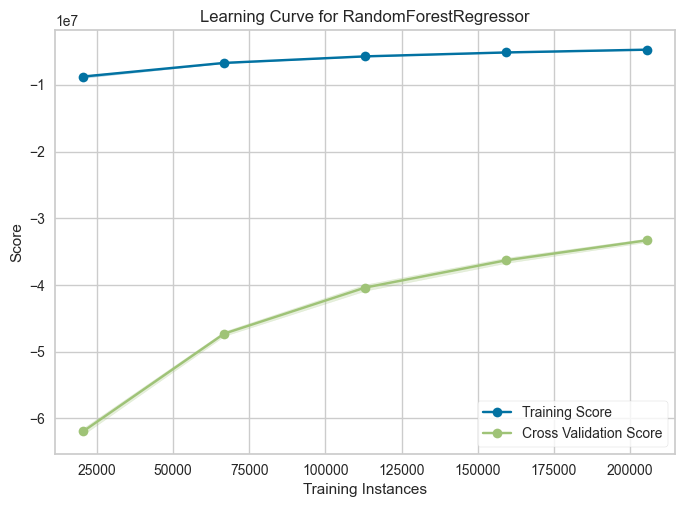

<Axes: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [37]:
# Assess whether sample size is sufficient for random forest to be used as a model given its a data-hungry algorithm
visualizer = LearningCurve(
    RandomForestRegressor(random_state=120),
    scoring="neg_mean_squared_error",
)
visualizer.fit(X_train, y_train)
visualizer.show()

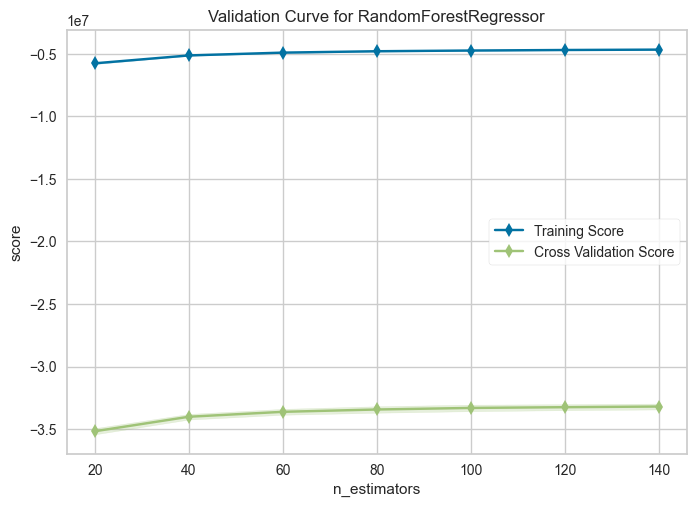

<Axes: title={'center': 'Validation Curve for RandomForestRegressor'}, xlabel='n_estimators', ylabel='score'>

In [38]:
viz = ValidationCurve(
    RandomForestRegressor(random_state=120),
    param_name="n_estimators",
    param_range=np.arange(20, 150, 20),
    cv=5,
    scoring="neg_mean_squared_error",
)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# Define the hyperparameter grid to search for optimal parameters (influenced by ValidationCurve)
PARAM_GRID = {
    "n_estimators": [
        50,
        75,
        100,
    ],  # Number of trees in the forest; Increase the number generally will improve performance, but it also increases the training time.
    "max_depth": [
        2,
        5,
        10,
    ],  # Maximum depth of trees. Increase the depth might increase performance but prone to overfitting.
    "min_samples_split": [
        2,
        4,
    ],  # Minimum number of samples to split an internal node. Increase value can prevent overfitting     (Potential values: [2, 5, 10])
    "min_samples_leaf": [
        1,
        2,
        3,
        4,
    ],  # Minimum number of samples required to be at a leaf node. Increase value can prevent overfitting (Potential values: [1, 2, 4])
}

# Perform hyperparameter tuning for Random Forest Regressor
rf = RandomForestRegressor(random_state=120)
grid_search = GridSearchCV(
    estimator=rf, param_grid=PARAM_GRID, cv=5, scoring="neg_mean_squared_error"
)
grid_search.fit(X_train, y_train)

# Print the best set of parameters and best score (neg mean squared error)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Choose the best estimator from the different parameters
best_rf = grid_search.best_estimator_

# Perform 5-fold cross validation to estimate generalized performance
scores = cross_val_score(
    best_rf, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)
print("Train set score:", np.mean(scores), "+/-", np.std(scores))

# NOTE:
# Code takes about ~10 minutes to run.

In [ ]:
# Explore the most importance features based on feature importance from the random forest
importances = best_rf.feature_importances_
importances_df = pd.DataFrame(
    {"feature": X_train.columns, "importance": importances}
)
importances_df.sort_values(by="importance", ascending=False, inplace=True)
importances_df["importance"] = round(importances_df["importance"], 4)

# Visualise top 10 important features
sns.barplot(x="importance", y="feature", data=importances_df.head(10), orient="h")
plt.tight_layout()

In [ ]:
# Explore importance for all features
importances_df

In [ ]:
# Perform feature selection using a 0.01 threshold
IMPORTANCE_THRESHOLD = 0.01
selected_features = importances_df[
    importances_df["importance"] >= IMPORTANCE_THRESHOLD
]["feature"].tolist()
selected_features

In [ ]:
# Get the subset of features and re-train using only the important columns
X_train_fi = X_train[selected_features]
X_test_fi = X_test[selected_features]

# Fit the best random forest model after the feature selection and save it for future inference
best_rf.fit(X_train_fi, y_train)

filename = "models/rf_model.pkl" 
dump_pickle(obj=best_rf, filename=filename)

# Evaluate the performance of the final model on the test set
scores = cross_val_score(
    best_rf, X_train_fi, y_train, cv=5, scoring="neg_mean_squared_error"
)
print("Cross-validation set score:", np.mean(scores), "+/-", np.std(scores))

In [ ]:
# Inference on the test (unseen) set using the best random forest model
y_pred = best_rf.predict(X_test_fi)

In [ ]:
# Calculate evaluation metrics to assess model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")  
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")  # R2 Score: 0.886